In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
dsc=data.Survived.value_counts(normalize=True).mul(100).round(1).reset_index()\
        .rename(columns = {'index': 'Survived', 'Survived': 'percentage'}).sort_values('Survived')
dsc

,Survived,percentage
0,0,61.6
1,1,38.4


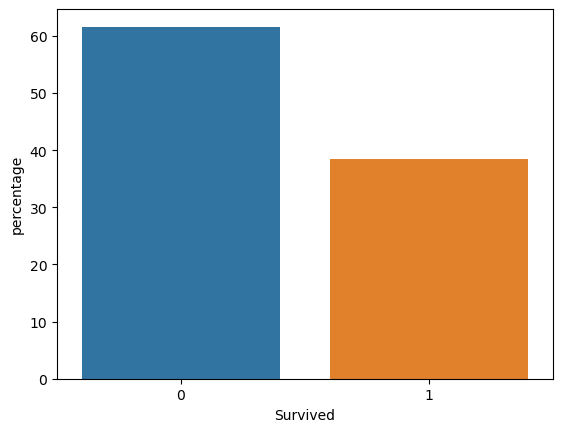

In [16]:
pl=sns.barplot(data=dsc,x='Survived',  y='percentage')

In [ ]:
Выжило всего 38,4% пассажиров, погибло 61,6%

In [23]:
data.groupby(["Pclass", "Sex"])["Survived"].value_counts(normalize=True).mul(100).round(1)

Pclass  Sex     Survived
1       female  1           96.8
                0            3.2
        male    0           63.1
                1           36.9
2       female  1           92.1
                0            7.9
        male    0           84.3
                1           15.7
3       female  0           50.0
                1           50.0
        male    0           86.5
                1           13.5
Name: Survived, dtype: float64

In [ ]:
Шанс женщины на выживаемость составляет 96.8%, 92.1% и 50% в зависимости от класса билета. 
Шанс на выживание мужчины гораздно ниже и составляет соответственно 36.9%, 15.7% и 13.5%.

In [34]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [40]:
data[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean().

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

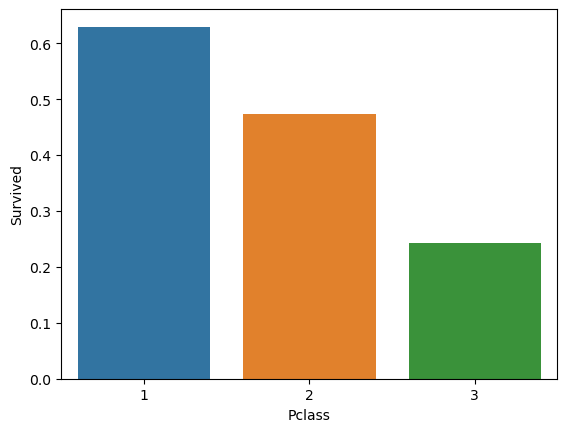

In [42]:
sns.barplot(x='Pclass', y='Survived', data=data, ci=None)

In [ ]:
Из этого графика следует что пассажиры более высого класса имеют большие шансы на спасение.

In [45]:
tab = pd.crosstab(data['Embarked'], data['Pclass'])
tab

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


Text(0, 0.5, 'Percentage')

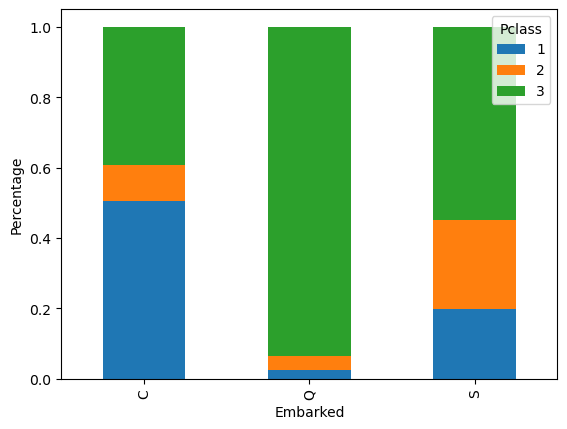

In [48]:
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Embarked')
plt.ylabel('Percentage')

In [ ]:
Из этого графика можно увидеть сколько пассажиров какого класса село на пароход в период его следования

In [49]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

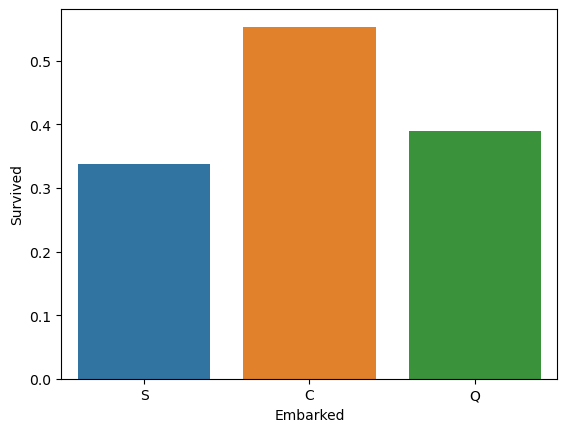

In [50]:
sns.barplot(x='Embarked', y='Survived', data=data, ci=None)

In [ ]:
Да данном графике показана выживаемость в зависимости от посадки в каком порту пассажиров